## **Introduction**

In **linear algebra**, we have an equation and a value of x, and we need to find the value of y. <br><br>

**Example:**

Equation: $y = 2x + 3$ <br>
Input: $x = [1, 2, 3, 4, 5]$ <br>
Output: $y = [5, 7, 9, 11, 13]$ <br> <br>

In **Machine Learning**, we have training data (input) and output (target) data, and we aim to find the underlying equation. <br><br>

**Example:**

Input: $x = [1, 2, 3, 4, 5]$ <br>
Output: $y = [5, 7, 9, 11, 13]$<br>

Goal: Find the equation $y = 2x + 3$. <br><br>

For example, to predict home prices:

Input (Area in sqft): `area = [2600, 3000, 3200, 3600, 4000]`<br>
Output (Price in USD): `price = [550k, 565k, 610k, 680k, 725k]`<br><br>

Beforehand, we might assume the equation would be in the form:

$price = m \times area + b$

Where $m$ and $b$ are coefficients we need to determine.

## **Need of Gradient Descent**

In [ ]:
import pandas as pd

# Provided data for area and price
area = [2600, 3000, 3200, 3600, 4000]
price = [550000, 565000, 610000, 680000, 725000]

# Create a DataFrame
df = pd.DataFrame({'area': area, 'price': price})

# Display the DataFrame
display(df)

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
# Imports
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Reshape the area data for scikit-learn
X = df['area'].values.reshape(-1, 1)
y = df['price'].values

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficient (slope) and intercept
m = model.coef_[0]
b = model.intercept_

print(f"Coefficient (m): {m}")
print(f"Intercept (b): {b}")

# Generate predicted prices for plotting the best-fit line
y_pred = model.predict(X)

Coefficient (m): 135.78767123287673
Intercept (b): 180616.43835616432


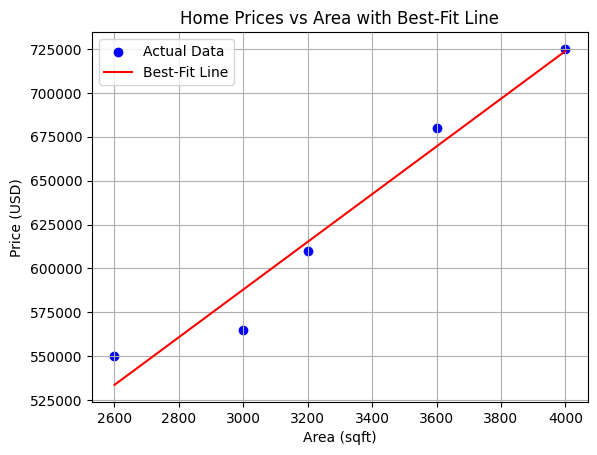

In [ ]:
# Plot the data and the best-fit line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Best-Fit Line')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (USD)')
plt.title('Home Prices vs Area with Best-Fit Line')
plt.legend()
plt.grid(True)
plt.show()

# This is the best fit line generated by the linear regression model

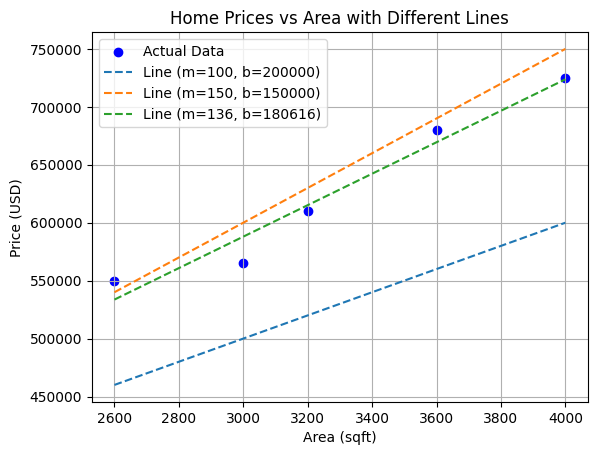

In [ ]:
# The Below snippet of code plots many best fit line to show there are many possibilities
# of random best fit line which can be generated this is AI generated

import numpy as np

# Define some example slopes (m) and intercepts (b)
# These are just for demonstration purposes to show different lines
example_lines = [
    {'m': 100, 'b': 200000},  # Example line 1
    {'m': 150, 'b': 150000},  # Example line 2
    {'m': model.coef_[0], 'b': model.intercept_} # The best-fit line from previous step
]

plt.scatter(X, y, color='blue', label='Actual Data')

for line in example_lines:
    m_ex = line['m']
    b_ex = line['b']
    y_pred_ex = m_ex * X + b_ex
    plt.plot(X, y_pred_ex, linestyle='--', label=f'Line (m={m_ex:.0f}, b={b_ex:.0f})')

plt.xlabel('Area (sqft)')
plt.ylabel('Price (USD)')
plt.title('Home Prices vs Area with Different Lines')
plt.legend()
plt.grid(True)
plt.show()

As you can see, there are many possible lines that can be drawn through the data points. To determine which line is the "best fit", we need a way to measure how well each line represents the data. This is where the concept of the **Mean Squared Error (MSE)** comes in.

MSE calculates the average of the squared differences between the actual data points and the points predicted by the line. The line with the lowest MSE is considered the best fit because it minimizes the overall error.

## **Mean Squared Error**

### Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a common metric used to evaluate the performance of a regression model. It measures the average of the squared differences between the actual observed values ($y_i$) and the values predicted by the model ($\hat{y}_i$).

The formula for MSE is:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:
- $n$ is the number of data points.
- $y_i$ is the actual value for the $i$-th data point.
- $\hat{y}_i$ is the predicted value for the $i$-th data point.

Since in linear regression, the predicted value $\hat{y}_i$ is given by the equation $\hat{y}_i = m x_i + b$, where $m$ is the slope and $b$ is the intercept, the MSE formula can also be written as:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - (m x_i + b))^2 $$

MSE is also often referred to as the **cost function** or **loss function** in the context of machine learning. The goal of training a linear regression model is to find the values of $m$ and $b$ that minimize this cost function.

### Why Calculating MSE for Every Possible Line is Inefficient

While the MSE formula is straightforward, calculating it for every single possible line (i.e., every combination of $m$ and $b$ values) to find the minimum is computationally very inefficient, especially with large datasets. Imagine trying out millions or billions of different slopes and intercepts – it would take an enormous amount of time and processing power.

### How Gradient Descent Solves This Problem

**Gradient Descent** is an optimization algorithm that provides a much more efficient way to find the values of $m$ and $b$ that minimize the MSE. Instead of checking every possible line, Gradient Descent starts with initial values for $m$ and $b$ and iteratively adjusts them in the direction that reduces the MSE the most.

It does this by calculating the **gradient** of the MSE function with respect to $m$ and $b$. The gradient tells us the direction of the steepest increase in the MSE. To minimize the MSE, Gradient Descent moves in the opposite direction of the gradient (the direction of steepest decrease). This iterative process continues until the algorithm converges to the minimum MSE, finding the optimal values for $m$ and $b$.

## **What is Gradient Descent**

### Understanding Gradient Descent

Gradient Descent is a powerful optimization algorithm used in machine learning to find the best values for the parameters of a model that minimize a function, often called the **cost function** or **loss function**.

Here's a breakdown:

*   **Goal:** Minimize a cost function (like Mean Squared Error) to find the best model parameters.
*   **Analogy:** Finding the lowest point in a valley by taking steps downhill.
*   **Cost Function (MSE):** Measures the difference between actual and predicted values. It quantifies how well our current line fits the data. The lower the MSE, the better the fit.
    *   Formula:
        $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
        Where $n$ is the number of data points, $y_i$ are actual values, and $\hat{y}_i$ are predicted values ($m x_i + b$).
*   **Why not try every line?** It's computationally impossible to calculate the MSE for every single possible combination of $m$ and $b$ values, especially with large datasets.
*   **How it works (Iterative Process):** Gradient Descent starts with initial values for the parameters and iteratively adjusts them to move towards the minimum of the cost function.
    1.  **Initialize Parameters ($m_{curr}, b_{curr}$):** We start with some initial guesses for the slope ($m$) and intercept ($b$). Often, these are initialized to 0, but other values can be used. The starting point affects the path taken to the minimum, but for convex cost functions like MSE in linear regression, it will eventually reach the global minimum.
    2.  **Set Learning Rate ($\alpha$):** This is a crucial hyperparameter that determines the size of the steps taken in each iteration.
        *   **Role:** Controls how quickly or slowly the algorithm converges.
        *   **Effect:**
            *   **Too Large:** Can cause the algorithm to overshoot the minimum and potentially diverge (cost increases).
            *   **Too Small:** Can lead to very slow convergence, requiring many iterations.
    3.  **Set Number of Iterations:** This determines how many times the parameter update process will be repeated.
        *   **Role:** Controls how long the algorithm runs.
        *   **Effect:** More iterations generally lead to better convergence, but too many can be computationally expensive and may not significantly improve the result after a certain point (when the cost function plateaus).
    4.  **Calculate Predicted Values ($\hat{y}$):** For the current $m_{curr}$ and $b_{curr}$, calculate the predicted output for each input data point using the linear equation:
        $$ \hat{y}_i = m_{curr} x_i + b_{curr} $$
    5.  **Calculate the Cost (MSE):** Compute the Mean Squared Error using the actual ($y_i$) and predicted ($\hat{y}_i$) values. This value should decrease with each successful iteration.
    6.  **Calculate Gradients ($\frac{\partial MSE}{\partial m}, \frac{\partial MSE}{\partial b}$):** Compute the partial derivatives of the MSE with respect to $m$ and $b$. These tell us the direction and rate of change of the cost function with respect to each parameter.
        *   Partial Derivative of MSE with respect to m:
            $$ \frac{\partial MSE}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i(y_i - \hat{y}_i) $$
        *   Partial Derivative of MSE with respect to b:
            $$ \frac{\partial MSE}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) $$
    7.  **Update Parameters:** Update $m_{curr}$ and $b_{curr}$ using the learning rate and the calculated gradients. We subtract the gradient multiplied by the learning rate because we want to move in the direction that decreases the cost.
        $$ m_{new} = m_{curr} - \alpha \times \frac{\partial MSE}{\partial m} $$
        $$ b_{new} = b_{curr} - \alpha \times \frac{\partial MSE}{\partial b} $$
    8.  **Repeat:** Repeat steps 4-7 for the specified number of iterations or until a convergence criterion is met (e.g., the change in cost between iterations is very small).
*   **Visualization:** Imagine a 3D plot of the cost function (like a bowl). Gradient Descent starts at a point on this surface and iteratively moves downwards along the steepest path (determined by the negative of the gradient) until it reaches the bottom of the bowl, which represents the minimum MSE and the optimal $m$ and $b$ values. The path taken depends on the learning rate and the initial starting point.

In Summary:

*   Gradient Descent is an optimization algorithm.
*   It minimizes a cost function by iteratively updating parameters.
*   It uses partial derivatives (gradients) to find the direction of steepest decrease.
*   The learning rate ($\alpha$) controls the step size.
*   The number of iterations determines how many updates occur.
*   The process aims to reach the global minimum of the cost function to find the best-fit line.

## **Implementation of Gradient Descent**

**Find the gradient descent or minimum point of vlues** <br>
x = [1,2,3,4,5] <br>
y = [5,7,9,11,13] <br>

In [ ]:
import numpy as np

def gradient_descent(x, y):
    # We have to start with some value of m and b and iteration
    # Basically we are doing trial and error method and after seeing how algo perform we change the no.of iteration
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations) :
        y_predicted = m_curr * x + b_curr
        # cost function and it should reduce in output
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        # finding m derivative and b derivative
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        # Finding m_curr and b_curr
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))

# Using np.array for better matrix multipication and faster then simple array
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 4.96, b 1.44, cost 89.0, iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002, iteration 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001, iteration 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613, iteration 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832, iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282, iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438, iteration 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738, iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156, iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794, iteration 9
m 3.2221235247119777, b 1.5293810083298451, cost 9.691269350698109, iteration 10
m 1.7770832372205707, b 1.1780607551353204, cost 7.8084968312098315, iteration 11
m 3.0439475772474127, b 1.5765710804477953, cost 6.302918117062937, iteration 1

## **Parameter Tunning**

We will start with learning rate = 0.001
we will see that we are close to 2 and 3 but not close to it so we should reduce it to 0.01

In [ ]:
def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.001

    for i in range(iterations) :
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

Streaming output truncated to the last 5000 lines.
m 2.1159781987036776, b 2.5812819029965524, cost 0.03193377887660422, iteration 5000
m 2.1159389869142173, b 2.581423469998337, cost 0.031912189147685885, iteration 5001
m 2.1158997883821145, b 2.5815649891368553, cost 0.03189061401511098, iteration 5002
m 2.115860603102887, b 2.581706460428289, cost 0.031869053469010554, iteration 5003
m 2.1158214310720536, b 2.581847883888815, cost 0.03184750749952369, iteration 5004
m 2.1157822722851356, b 2.581989259534605, cost 0.03182597609679516, iteration 5005
m 2.115743126737655, b 2.5821305873818248, cost 0.031804459250976906, iteration 5006
m 2.115703994425136, b 2.5822718674466354, cost 0.03178295695222696, iteration 5007
m 2.115664875343103, b 2.5824130997451915, cost 0.03176146919071039, iteration 5008
m 2.1156257694870835, b 2.5825542842936424, cost 0.031739995956599286, iteration 5009
m 2.115586676852606, b 2.5826954211081325, cost 0.031718537240071565, iteration 5010
m 2.1155475974352,

Start with learning rate = 0.01 we will reach to 2 and 3 we have reached to 2 and 3

In [ ]:
def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.01

    for i in range(iterations) :
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

Streaming output truncated to the last 5000 lines.
m 2.000000027748417, b 2.9999998998194113, cost 1.8391702597594785e-15, iteration 5000
m 2.0000000276546004, b 2.999999900158118, cost 1.826754969563614e-15, iteration 5001
m 2.0000000275611014, b 2.9999999004956797, cost 1.81442346865097e-15, iteration 5002
m 2.000000027467918, b 2.9999999008321, cost 1.802175231104541e-15, iteration 5003
m 2.0000000273750502, b 2.999999901167383, cost 1.7900096116236763e-15, iteration 5004
m 2.0000000272824963, b 2.999999901501532, cost 1.7779261911764547e-15, iteration 5005
m 2.0000000271902554, b 2.9999999018345513, cost 1.7659243149753253e-15, iteration 5006
m 2.0000000270983262, b 2.999999902166445, cost 1.7540034779000308e-15, iteration 5007
m 2.0000000270067075, b 2.9999999024972164, cost 1.7421631063296812e-15, iteration 5008
m 2.000000026915399, b 2.9999999028268696, cost 1.7304026364503835e-15, iteration 5009
m 2.0000000268243987, b 2.999999903155408, cost 1.7187215496941953e-15, iteration 5

Cost function should reduce if we change the value of learning rate but we choose 0.1 learning rate we will miss the global minima

In [ ]:
def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.1

    for i in range(iterations) :
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 6.2, b 1.8, cost 89.0, iteration 0
m -2.320000000000001, b -0.4800000000000002, cost 165.24, iteration 1
m 9.272000000000002, b 2.8080000000000007, cost 307.59840000000014, iteration 2
m -6.611200000000007, b -1.5168000000000017, cost 573.3613440000004, iteration 3
m 15.043520000000012, b 4.5532800000000035, cost 1069.4523110400019, iteration 4
m -14.584192000000016, b -3.5834880000000053, cost 1995.4416651264037, iteration 5
m 25.851123200000032, b 7.6837248000000065, cost 3723.822955597831, iteration 6
m -29.431582720000037, b -7.563694080000013, cost 6949.846718357686, iteration 7
m 46.056115712000064, b 13.407994368000011, cost 12971.181693567853, iteration 8
m -57.11213547520009, b -15.10727393280003, cost 24209.895819923568, iteration 9
m 83.79892692992013, b 23.981462138880037, cost 45186.721312913374, iteration 10
m -108.74758959923219, b -29.294186446848048, cost 84339.4971995226, iteration 11
m 154.27361938718752, b 43.61320460206089, cost 157417.24894304306, iteration 12
m

/tmp/ipython-input-142034130.py:9: RuntimeWarning: overflow encountered in scalar add
  cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
/tmp/ipython-input-142034130.py:9: RuntimeWarning: overflow encountered in scalar power
  cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
/tmp/ipython-input-142034130.py:10: RuntimeWarning: overflow encountered in scalar add
  md = -(2/n)*sum(x*(y-y_predicted))
/tmp/ipython-input-142034130.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  m_curr = m_curr - learning_rate * md
